# Random Forest, Penguins
---

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import myutils as my

In [56]:
penguin = pd.read_csv("https://raw.githubusercontent.com/devdio/datasets/main/penguins.csv")

In [57]:
penguin.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [58]:
penguin.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [59]:
#!pip install missingno

<AxesSubplot: >

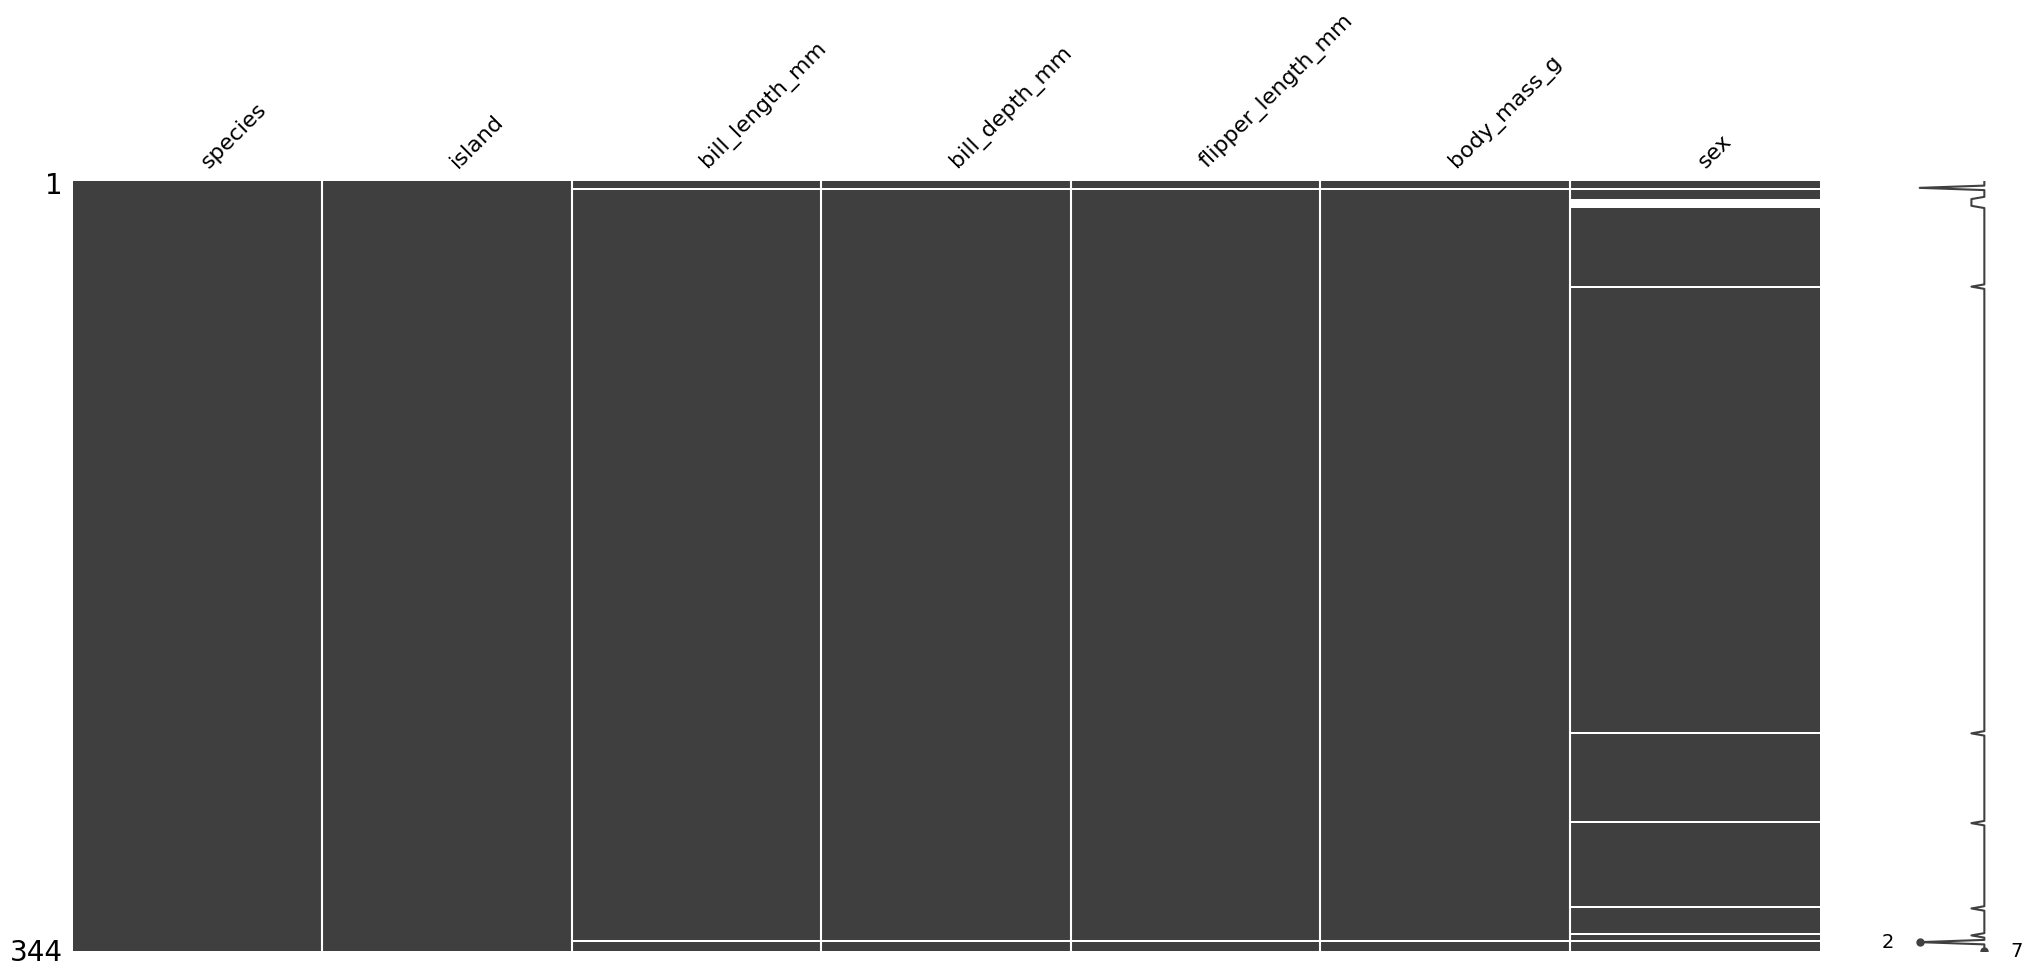

In [60]:
import missingno as msno

msno.matrix(penguin)
# 하얀 줄: 결측치 내용

In [61]:
penguin.loc[penguin['bill_length_mm'].isna()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [62]:
penguin['bill_length_mm'].isnull().index

RangeIndex(start=0, stop=344, step=1)

In [63]:
df = penguin.dropna(subset=['bill_length_mm'])

<AxesSubplot: >

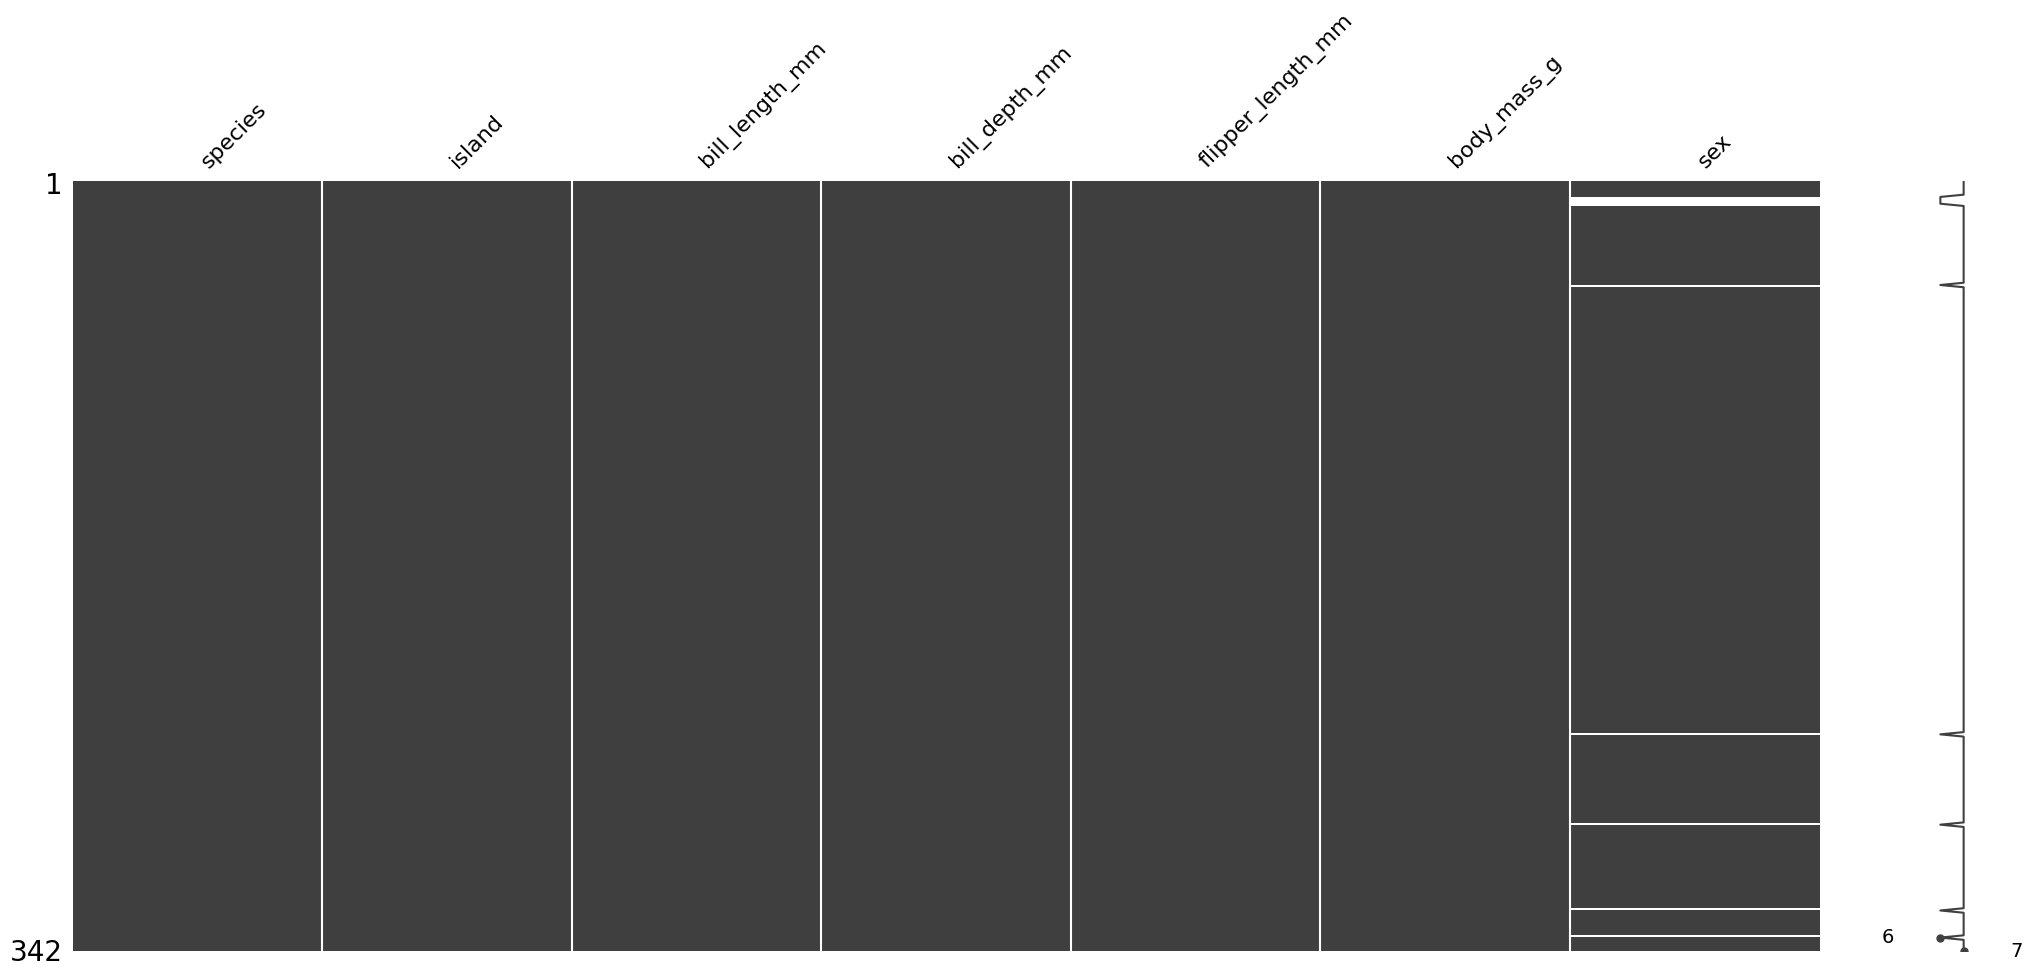

In [64]:
msno.matrix(df)

In [65]:
df['sex'].value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

In [66]:
df['sex'] = df['sex'].fillna('NONE')
#df['sex'] = df['sex'].fillna('NONE', inplace=True)

C:\Users\006\AppData\Local\Temp\ipykernel_19872\578211307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = df['sex'].fillna('NONE')


<AxesSubplot: >

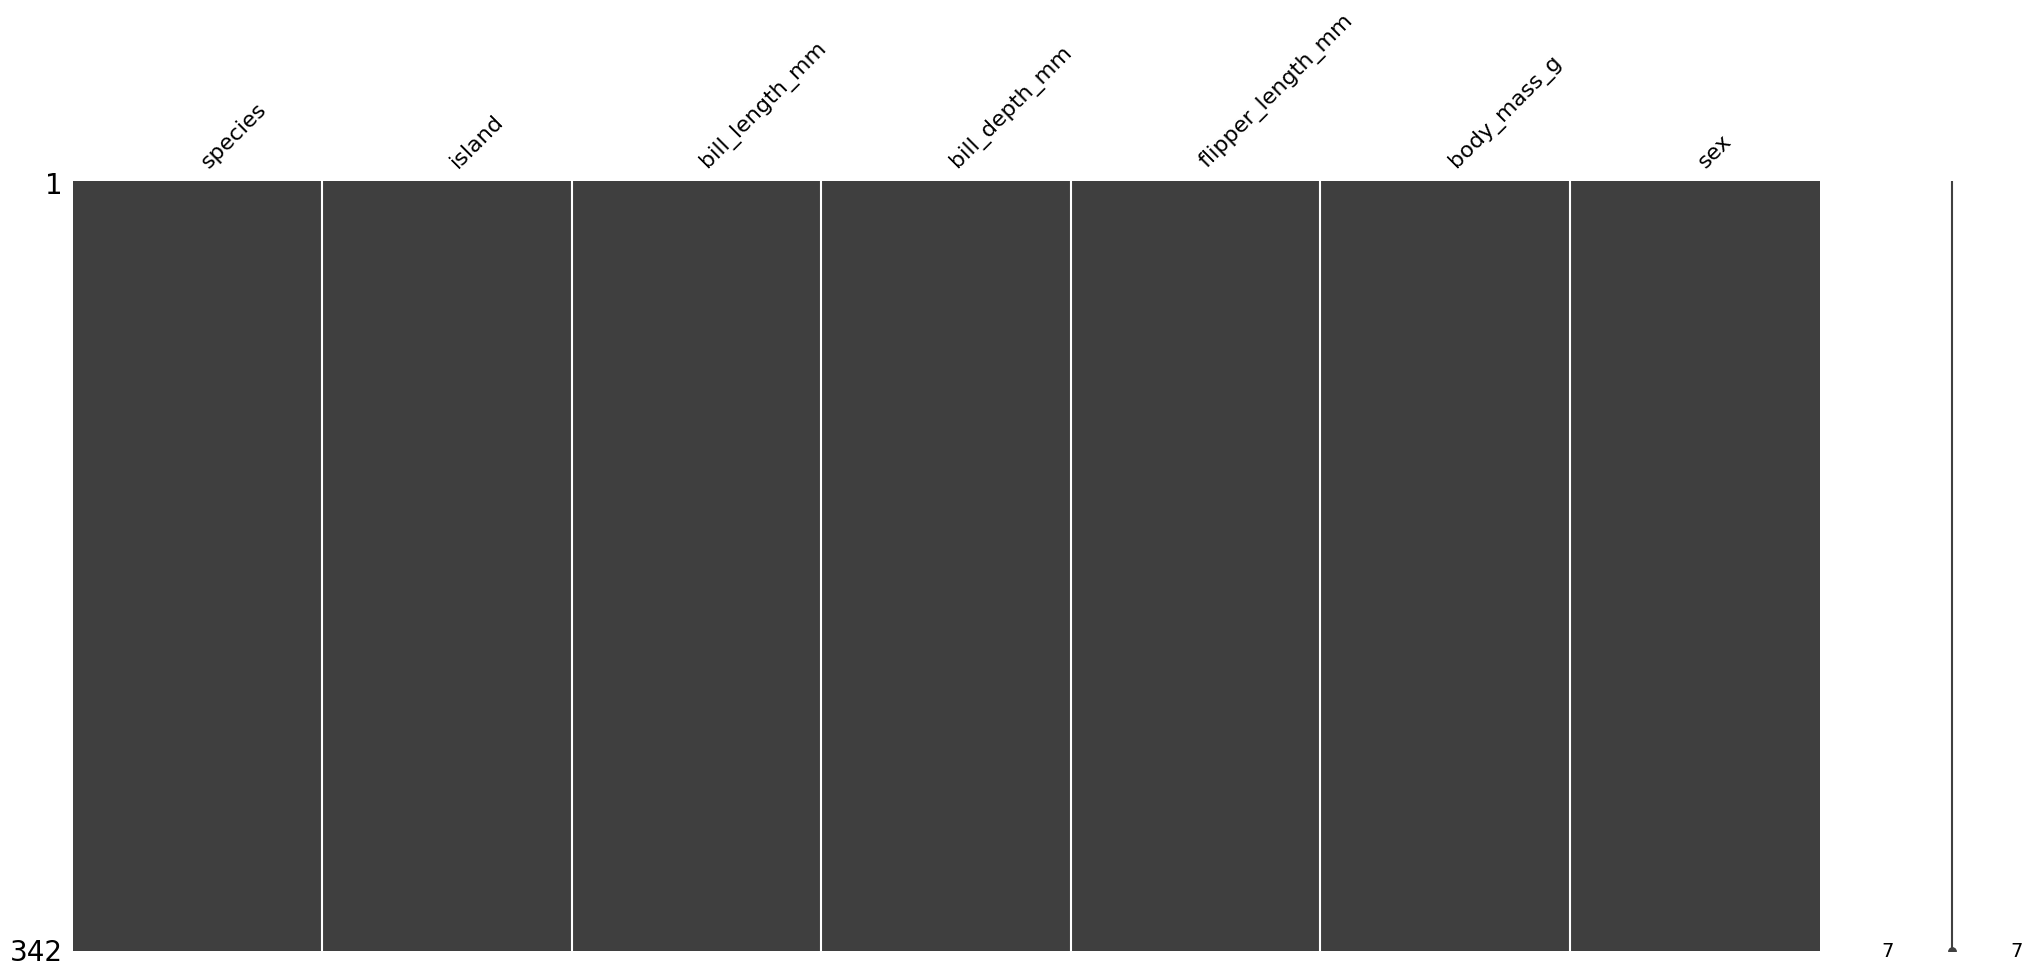

In [67]:
msno.matrix(df)

In [68]:
# x, y 분리
# x만 인코딩

## 전처리

In [69]:
X = df.drop('species', axis=1)
y = df['species']

In [70]:
X['sex'].unique()

array(['MALE', 'FEMALE', 'NONE'], dtype=object)

In [71]:
X['island'] = X['island'].map({'Biscoe':0,
                'Dream':1,
                'Torgersen':2})
X['sex'] = X['sex'].map({'FEMALE':0,
                'MALE':1,
                'NONE':2})
X

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.1,18.7,181.0,3750.0,1
1,2,39.5,17.4,186.0,3800.0,0
2,2,40.3,18.0,195.0,3250.0,0
4,2,36.7,19.3,193.0,3450.0,0
5,2,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...
338,0,47.2,13.7,214.0,4925.0,0
340,0,46.8,14.3,215.0,4850.0,0
341,0,50.4,15.7,222.0,5750.0,1
342,0,45.2,14.8,212.0,5200.0,0


In [51]:
# 또다른 방법
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['island'] = encoder.fit_transform(df['island'])
df['sex'] = encoder.fit_transform(df['sex'])
df.head()

C:\Users\006\AppData\Local\Temp\ipykernel_19872\2789060829.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['island'] = encoder.fit_transform(df['island'])
C:\Users\006\AppData\Local\Temp\ipykernel_19872\2789060829.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = encoder.fit_transform(df['sex'])


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181.0,3750.0,1
1,Adelie,2,39.5,17.4,186.0,3800.0,0
2,Adelie,2,40.3,18.0,195.0,3250.0,0
4,Adelie,2,36.7,19.3,193.0,3450.0,0
5,Adelie,2,39.3,20.6,190.0,3650.0,1


In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
            # startify -> y값이 비율에 맞게 분리될 수 있게끔 함
                                                    random_state=2022)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(273, 6) (69, 6) (273,) (69,)


In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [76]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 학습

In [84]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=30, max_depth=3)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=30)

In [85]:
clf.score(X_train, y_train)

0.989010989010989

In [86]:
feature_name = X.columns
feature_name

Index(['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [89]:
clf.feature_importances_

array([0.116032  , 0.29716742, 0.23805744, 0.21393354, 0.13366584,
       0.00114377])

In [92]:
sr = pd.Series(clf.feature_importances_,
          index = feature_name)
sr

island               0.116032
bill_length_mm       0.297167
bill_depth_mm        0.238057
flipper_length_mm    0.213934
body_mass_g          0.133666
sex                  0.001144
dtype: float64

In [96]:
sr = sr.sort_values(ascending=False)

<AxesSubplot: >

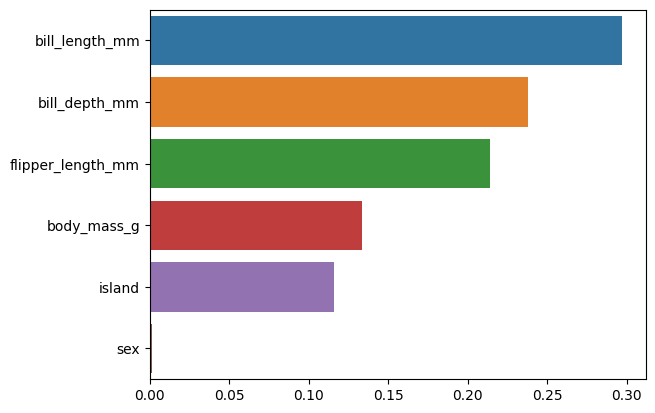

In [97]:
sns.barplot(x=sr, y=sr.index)

### 테스트 데이터

In [98]:
y_pred = clf.predict(X_test)
y_pred[:5]

array(['Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo'], dtype=object)

In [99]:
my.print_score(y_test, y_pred, average='macro')

accuracy: 0.9565217391304348
precision: 0.9411764705882352
recall: 0.9666666666666667


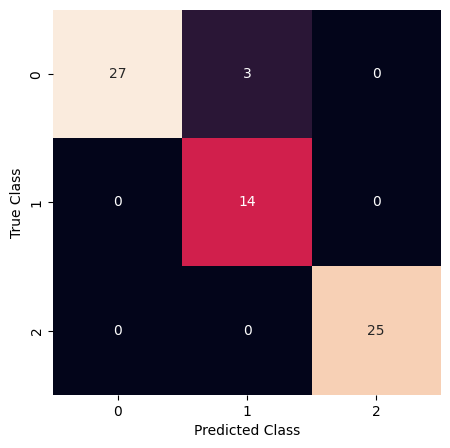

In [100]:
my.plot_confusion_matrix(y_test, y_pred)